# Part 1: Modeling

# 1. Let's import necessary dependencies for our project


In [383]:
import pandas as pd
import numpy as np #array manipulations
import seaborn as sns # visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn import metrics, preprocessing
from IPython.display import Image, display
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score, KFold
%matplotlib inline

# 2. Import our dataset into pandas dataframe object
For this task we have been provided with two files. The first file contains measurements of Breast Cancer Cells and the second file contains the header for this file

In [298]:
header = open("C:/Users/subra/Desktop/field_names.txt","r")
#read the lines from the text file and split each one in a new line
header_line = header.read().split()
header_line

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [299]:
###load the breast cancer measurement csv file and set the column names to the filed names stored above(header_line)
df=pd.read_csv("C:/Users/subra/Desktop/breast-cancer.csv",names=header_line)
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 3. Data Pre-processing

In [300]:
#### we don't need the ID column, so let's drop that column
df.drop('ID', axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


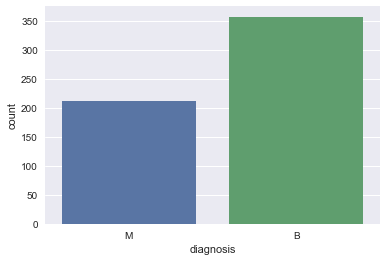

In [301]:
#separting the data by categories for visuliazation puprose
data_M = df[df['diagnosis']=='M']
data_B = df[df['diagnosis']=='B']
#Histogram of Class frequencies of Breast Cancer Diagnosis.
import seaborn as sns 
sns.countplot('diagnosis',data=df)

The prior of classes(categories) play an important role on the performance of a classifier

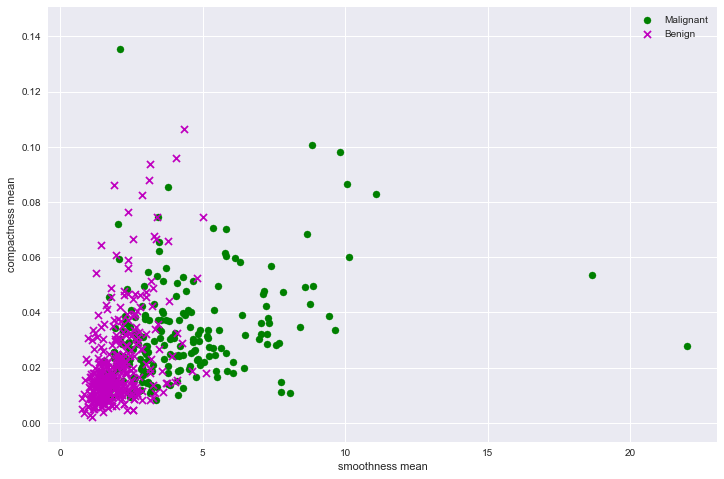

In [362]:
#randomly choosing columns smoothness mean and compactness_mean to plot on 2-D axis for visual exploration
fig, (ax) = plt.subplots(figsize=(12,8))
ax.scatter(data_M['smoothness_mean'], data_M['compactness_mean'], s=50, c='g', marker='o', label='Malignant')
ax.scatter(data_B['smoothness_mean'], data_B['compactness_mean'], s=50, c='m', marker='x', label='Benign')
ax.legend()
ax.set_xlabel('smoothness mean')
ax.set_ylabel('compactness mean')

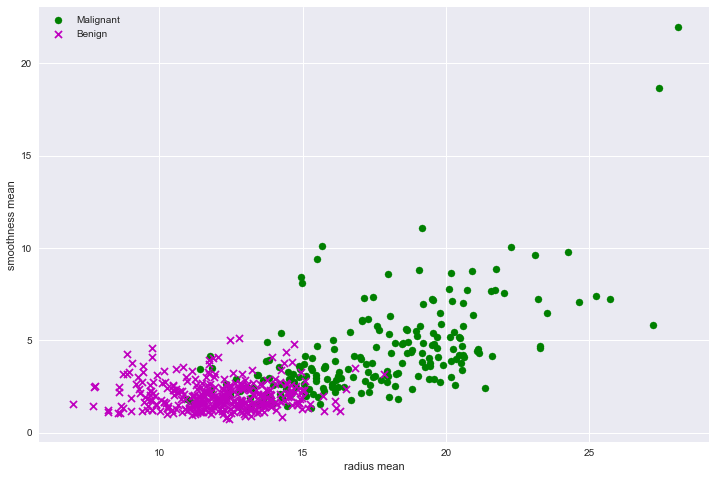

In [364]:
#randomly choosing columns radius mean and smoothness mean to plot on 2-D axis for visual exploration

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data_M['radius_mean'], data_M['smoothness_mean'], s=50, c='g', marker='o', label='Malignant')
ax.scatter(data_B['radius_mean'], data_B['smoothness_mean'], s=50, c='m', marker='x', label='Benign')
ax.legend()
ax.set_xlabel('radius mean')
ax.set_ylabel('smoothness mean')

From the above plots it is quite evident that compactness mean and smoothness mean can be used to chart a separable boundary between Malignant and Benign type of Cancer.

# Missing Values

In [331]:
df.isnull().any()

diagnosis                     False
radius_mean                   False
radius_sd_error               False
radius_worst                  False
texture_mean                  False
texture_sd_error              False
texture_worst                 False
perimeter_mean                False
perimeter_sd_error            False
perimeter_worst               False
area_mean                     False
area_sd_error                 False
area_worst                    False
smoothness_mean               False
smoothness_sd_error           False
smoothness_worst              False
compactness_mean              False
compactness_sd_error          False
compactness_worst             False
concavity_mean                False
concavity_sd_error            False
concavity_worst               False
concave_points_mean           False
concave_points_sd_error       False
concave_points_worst          False
symmetry_mean                 False
symmetry_sd_error             False
symmetry_worst              

# Descriptive statistics

In [332]:
df.shape

(569, 31)

In [333]:
df.get_dtype_counts()

float64    30
object      1
dtype: int64

In [334]:
df.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [308]:
avg=pd.DataFrame(df.mean())
avg.head()

,0
radius_mean,14.127292
radius_sd_error,19.289649
radius_worst,91.969033
texture_mean,654.889104
texture_sd_error,0.096360


In [309]:
median=pd.DataFrame(df.median())
median.head()

,0
radius_mean,13.37000
radius_sd_error,18.84000
radius_worst,86.24000
texture_mean,551.10000
texture_sd_error,0.09587


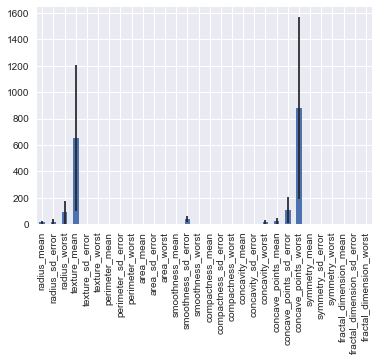

In [378]:
avg.plot(yerr=median,kind='bar',legend=False)

In [311]:
fea_avg=pd.concat([avg,median],axis=1)
fea_avg.columns=['Average','median']
fea_avg.head()

,Average,median
radius_mean,14.127292,13.37000
radius_sd_error,19.289649,18.84000
radius_worst,91.969033,86.24000
texture_mean,654.889104,551.10000
texture_sd_error,0.096360,0.09587


In [312]:
x=df.iloc[:,1:31].values
y=df.iloc[:,0:1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Feature Selection

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 10 and find best 10 features.

In [313]:
#Ranking of features by Chi2 method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', (select_feature.scores_))


Score list: [  2.10952274e+02   6.86835459e+01   1.58542291e+03   4.35882472e+04
   1.16602030e-01   4.19953838e+00   1.49994945e+01   8.35975574e+00
   2.06246071e-01   2.15128072e-04   2.88901517e+01   3.42617835e-02
   2.02743541e+02   7.36233168e+03   4.41907010e-03   4.20685619e-01
   5.77229893e-01   1.97996479e-01   3.08390029e-04   3.17821831e-03
   3.96202415e+02   1.35206566e+02   2.92889254e+03   9.29175115e+04
   3.10137553e-01   1.51417061e+01   2.90940473e+01   1.06556712e+01
   1.08184602e+00   1.74011001e-01]


# What if we want to observe all correlation between features? 
#HeatMap for finding the Correlation between the features

In [314]:
features_mean1= list(df.columns[1:15]) ##First 15 features
features_mean2= list(df.columns[15:30]) ##Next 15 features

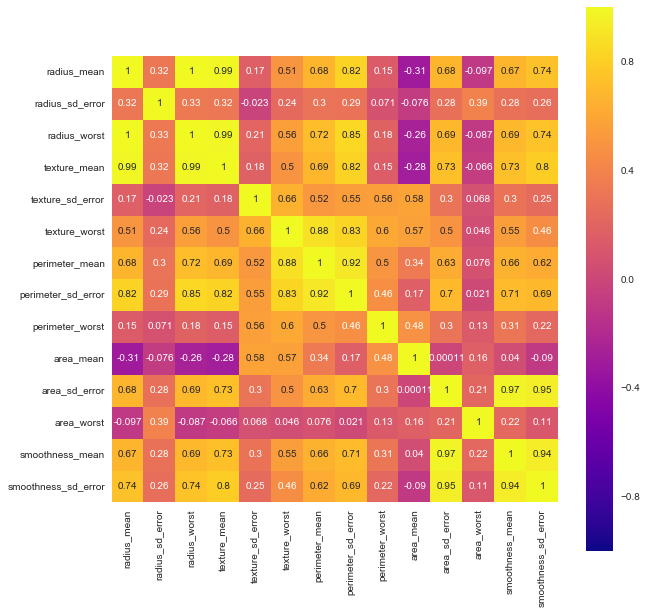

In [373]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean1].corr(), annot=True, square=True, cmap='plasma')
#plt.show()

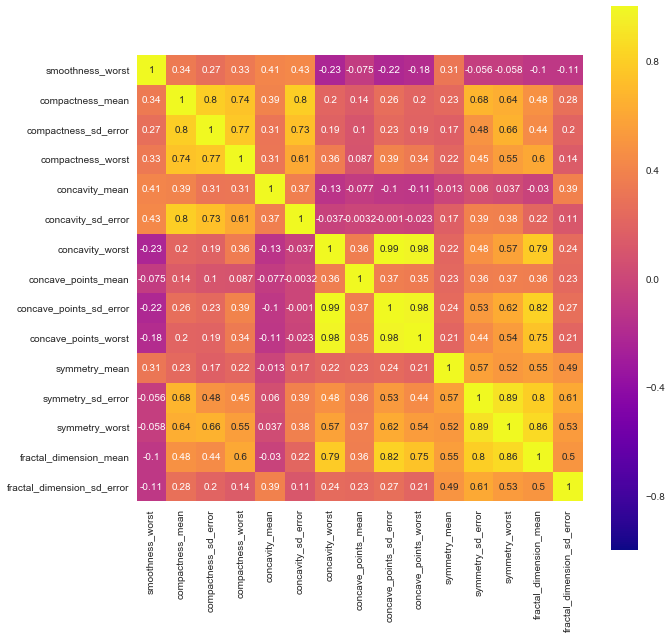

In [374]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean2].corr(), annot=True, square=True, cmap='plasma')
#plt.show()

As it can be seen in map heat figure radius_mean, texture_mean and radius_worst are correlated with each other so we will use only radius_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. 

In [375]:
features=list(['radius_mean','texture_worst','perimeter_worst','texture_sd_error','concavity_sd_error','concave_points_mean','area_worst','symmetry_mean','fractal_dimension_sd_error'])

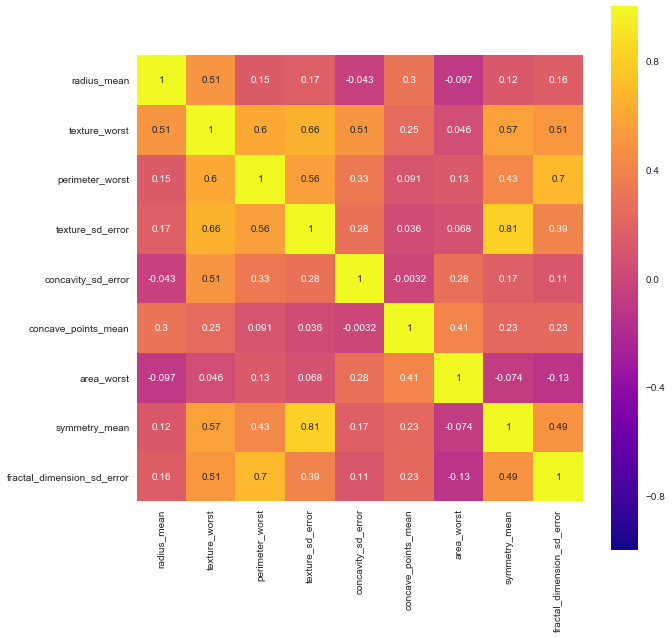

In [376]:
plt.figure(figsize=(10,10))
sns.heatmap(df[features].corr(), annot=True, square=True, cmap='plasma')
plt.show()

After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. 

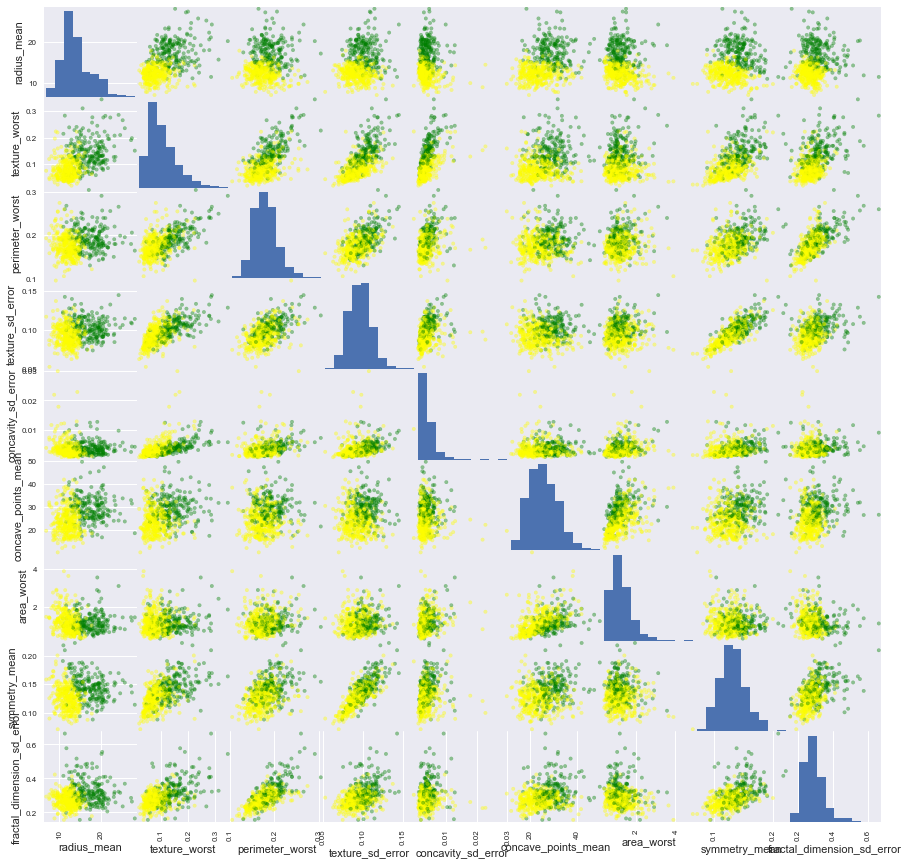

In [370]:
color_dic = {'M':'green', 'B':'yellow'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(df[features], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

** 1. Radius, area and perimeter have a strong linear relationship as expected. This graph shows the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean cant be used for classify two category because both category are mixed there is no separable plane


Best 10 features to classify is that radius_mean, radius_worst, radius_sd_error, texture_worst,perimeter_worst,perimeter_mean,texture_sd_error,concavity_sd_error,concave_points_mean and symmetry_mean. So lets se what happens if we use only these best scored 10 feature.

In [320]:
x1=df[['radius_mean','radius_worst','radius_sd_error','texture_worst','perimeter_worst','perimeter_mean','texture_sd_error','concavity_sd_error','concave_points_mean','area_worst','symmetry_mean']]
x=df.iloc[:,1:31].values
y=df.iloc[:,0:1].values
x1

,radius_mean,radius_worst,radius_sd_error,texture_worst,perimeter_worst,perimeter_mean,texture_sd_error,concavity_sd_error,concave_points_mean,area_worst,symmetry_mean
0,17.990,122.80,10.38,0.27760,0.2419,0.300100,0.11840,0.006193,17.33,0.9053,0.16220
1,20.570,132.90,17.77,0.07864,0.1812,0.086900,0.08474,0.003532,23.41,0.7339,0.12380
2,19.690,130.00,21.25,0.15990,0.2069,0.197400,0.10960,0.004571,25.53,0.7869,0.14440
3,11.420,77.58,20.38,0.28390,0.2597,0.241400,0.14250,0.009208,26.50,1.1560,0.20980
4,20.290,135.10,14.34,0.13280,0.1809,0.198000,0.10030,0.005115,16.67,0.7813,0.13740
5,12.450,82.57,15.70,0.17000,0.2087,0.157800,0.12780,0.005082,23.75,0.8902,0.17910
6,18.250,119.60,19.98,0.10900,0.1794,0.112700,0.09463,0.002179,27.66,0.7732,0.14420
7,13.710,90.20,20.83,0.16450,0.2196,0.093660,0.11890,0.005412,28.14,1.3770,0.16540
8,13.000,87.50,21.82,0.19320,0.2350,0.185900,0.12730,0.003749,30.73,1.0020,0.17030
9,12.460,83.97,24.04,0.23960,0.2030,0.227300,0.11860,0.010080,40.68,1.5990,0.18530


In [361]:
#Encoding Y the categorical variable to 1 & 0
LabelEncoder_X=LabelEncoder()
y=LabelEncoder_X.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

# Do we need Feature Scaling?
We should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the radius_worst feature's max value is 188.50 and concavity_sd_error features' max 0.029840. So defenitly we need Feature Scaling

In [340]:
x1.describe()

,radius_mean,radius_worst,radius_sd_error,texture_worst,perimeter_worst,perimeter_mean,texture_sd_error,concavity_sd_error,concave_points_mean,area_worst,symmetry_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,19.289649,0.104341,0.181162,0.088799,0.096360,0.003795,25.677223,1.216853,0.132369
std,3.524049,24.298981,4.301036,0.052813,0.027414,0.079720,0.014064,0.002646,6.146258,0.551648,0.022832
min,6.981000,43.790000,9.710000,0.019380,0.106000,0.000000,0.052630,0.000895,12.020000,0.360200,0.071170
25%,11.700000,75.170000,16.170000,0.064920,0.161900,0.029560,0.086370,0.002248,21.080000,0.833900,0.116600
50%,13.370000,86.240000,18.840000,0.092630,0.179200,0.061540,0.095870,0.003187,25.410000,1.108000,0.131300
75%,15.780000,104.100000,21.800000,0.130400,0.195700,0.130700,0.105300,0.004558,29.720000,1.474000,0.146000
max,28.110000,188.500000,39.280000,0.345400,0.304000,0.426800,0.163400,0.029840,49.540000,4.885000,0.222600


In [341]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=0)

In [342]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
x_train 

array([[-1.15036482, -1.12855021, -0.39064196, ...,  0.21353282,
         1.48720153,  0.34249851],
       [-0.93798972, -0.94820146,  0.68051405, ...,  1.06684183,
         0.75941203, -0.09553745],
       [ 0.574121  ,  0.51394098, -1.03333557, ..., -0.97781783,
        -1.05784511, -0.52472419],
       ..., 
       [-1.32422924, -1.31754581, -0.20048168, ..., -0.08512533,
         0.06856616,  0.03720072],
       [-1.24380987, -1.28007609, -0.2245526 , ..., -0.77269547,
         6.78861237, -2.71180676],
       [-0.73694129, -0.71226578,  1.14989702, ...,  1.90702301,
         3.12934586, -0.11766047]])

# Model Classification

In [387]:
classifier=SVC()
classifier.fit(x_train,y_train)
classifier_score = classifier.score(x_test, y_test)
classifier_score

0.94736842105263153

The SVM is working fine with good parameter it shows us what is the use of running of parameters
In the first by using default I was getting only 80 % accuracy. The results show a similar tight distribution for all classifiers except SVM which is encouraging, suggesting low variance. The poor results for SVM are surprising. But with tuned parameter it is 95 %. 

In [389]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
metrics.accuracy_score(prediction,y_test)

0.96491228070175439

We get better accuracy when we apply Random Forest classifier. An advantage with Random Forest is that it returns a feature importance matrix which can be used to select features. So lets select the top 10 features and use them as predictors.

# Evaluation

In [355]:
y_pred = classifier.fit(x_train, y_train).predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[65,  2],
       [ 4, 43]])

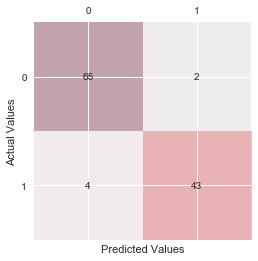

             precision    recall  f1-score   support

          0       0.94      0.97      0.96        67
          1       0.96      0.91      0.93        47

avg / total       0.95      0.95      0.95       114



In [356]:
fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))



Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix 

# Comparing with other Models

In [390]:
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'SVM' , SVC()))


# Test options and evaluation metric 

In [392]:
num_folds = 10
num_instances = len(x_train)
seed = 7 
scoring =  'accuracy'

num_folds = 10
num_instances = len(x_train)
seed = 7 
scoring =  'accuracy'
results = []
names = []
for name, model in models:
 kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
 cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
print('-> 10-Fold cross-validation accurcay score for the training data for six classifiers')

LR: 0.969372 (0.024315)
KNN: 0.958261 (0.022975)
CART: 0.905652 (0.045863)
SVM: 0.964928 (0.022383)
-> 10-Fold cross-validation accurcay score for the training data for six classifiers


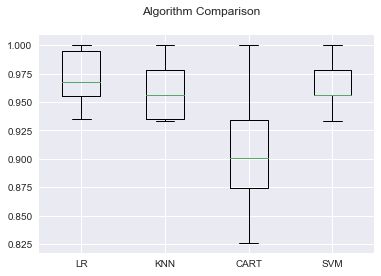

In [393]:
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Conclusion
Shortly, I tried to show importance of feature selection and data visualization. Default data includes 33 feature but after feature selection we drop this number from 33 to 10 with accuracy 95%. In this kernel we just tried basic things, I am sure with these data visualization and feature selection methods, you can easily ecxeed the % 95 accuracy.

# Part 2: Feedback

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression 

##It will show an error because it should be sklearn.linear_model

from sklearn.cross_validation import cross_val_score

# Load data
#Variable should have proper naming eg: "d" -> dataset
d = pd.read_csv('../data/train.csv')

#### You may try some EDA before you start building your data, this helps understand your data better.
####1) Finding the Missing Values
####2) Predict the variables that are highly correlated
####3) Normalize the data using Feature Scaling
####4) If you find any catogerical data encode those datas. 
##eg: 2 catogerical data:Label encoder
##    more than 2 catogerical data:One hot encoder

# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()
### you need to fit your model before evaluation\
    
# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

##Always keep your imports at the top of the script so it can lead to confusion. 
###the cross validation package was imported twice in this script

scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
### We are not splitting datas into training and test set 
### K-fold cross validation of 1 is not very useful

print(scores.mean())
###There are a few mistakes here which would be best solved through practice .


###This script shows a general understanding of the tools necessary to build a linear regression analysis. 
###There are a few mistakes here which would be best solved through practice of best practices of organization.

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
### Well formatted document

# Load data
data = pd.read_csv('../data/train.csv')
#### You may try some EDA before you start building your data, this helps understand your data better.
#### 1) Finding the Missing Values
#### 2) Predict the variables that are highly correlated
#### 3) Normalize the data using Feature Scaling
#### 4) If you find any catogerical data encode those datas.

# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()
### you need to fit your model before evaluation
### lables are clearly defined

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

### The workflow and code is well formatted
### K-fold of 5 will give reliable test results.
